# WeatherPy

## Script Dependencies

In [1]:
# Script Dependecies
import numpy as np
import requests
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
from api_keys import weather_api_key
from scipy.stats import linregress

## City List Generation

In [2]:
# Create empty list for latitude and longitude conbinations
lat_lngs = []

# Create empyt list for city names
cities = []

# Define the ranges for latitudes and longitudes (tuples)
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Indentify nearest city for each lat_lng combination, and add city name to cities if unique
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)

# Print length of cities
print(f"The list of cities contains a total of {len(cities)} unique city names")

The list of cities contains a total of 586 unique city names


## Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from a random generated cities list

In [3]:
# Create empty list to store the data of each city in cities
city_data =[]

# Initialize print log
print("Beggining Data Retrival \n"
      "---------------------------------------------------------------------------------------")

# Initialzie auxiliar counters
record_count = 1
set_count = 1

# Loop through all the cities in the list to retrieve the weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL for each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run the API Request and Retrieve the relevant Information
    try:
        city_weather_data = requests.get(city_url).json()
        city_lat = city_weather_data["coord"]["lat"]
        city_lng = city_weather_data["coord"]["lon"]
        city_max_temp = city_weather_data["main"]["temp_max"]
        city_humidity = city_weather_data["main"]["humidity"]
        city_clouds = city_weather_data["clouds"]["all"]
        city_wind = city_weather_data["wind"]["speed"]
        city_country = city_weather_data["sys"]["country"]
        city_date = city_weather_data["dt"]

        # Append the City information into city_data list
        city_data.append({
            "City": city, 
            "Lat": city_lat, 
            "Lng": city_lng, 
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date})
    except:
        print(f"City {city} not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("---------------------------------------------------------------------------------------\n"
      "Data Retrieval Complete\n"
      "---------------------------------------------------------------------------------------")

Beggining Data Retrival 
---------------------------------------------------------------------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | invercargill
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | lubang
Processing Record 5 of Set 1 | port elizabeth
Processing Record 6 of Set 1 | taiohae
City taiohae not found. Skipping...
Processing Record 7 of Set 1 | morada nova
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | holualoa
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | thompson
Processing Record 12 of Set 1 | okha
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | atafu village
Processing Record 17 of Set 1 | el charco
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | gibsonton
Processing Record 20 of Set 1 | utrik
Processing Record 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show the DataFrame record count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [5]:
# Display Sample Data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,22.17,75,61,11.40,PN,1713783626
1,invercargill,-46.4000,168.3500,6.57,86,46,3.49,NZ,1713783507
2,yellowknife,62.4560,-114.3525,-1.25,89,100,3.66,CA,1713783628
3,lubang,13.8584,120.1240,29.32,76,5,3.08,PH,1713783629
4,port elizabeth,-33.9180,25.5701,20.78,68,28,8.67,ZA,1713783630
5,morada nova,-5.1067,-38.3725,26.32,85,100,2.13,BR,1713783632
6,avarua,-21.2078,-159.7750,26.07,70,64,7.03,CK,1713783633
7,holualoa,19.6228,-155.9522,21.90,74,67,1.60,US,1713783634
8,port-aux-francais,-49.3500,70.2167,5.37,82,14,11.14,TF,1713783635
9,thompson,55.7435,-97.8558,-0.31,98,100,1.57,CA,1713783636


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,22.17,75,61,11.40,PN,1713783626
1,invercargill,-46.4000,168.3500,6.57,86,46,3.49,NZ,1713783507
2,yellowknife,62.4560,-114.3525,-1.25,89,100,3.66,CA,1713783628
3,lubang,13.8584,120.1240,29.32,76,5,3.08,PH,1713783629
4,port elizabeth,-33.9180,25.5701,20.78,68,28,8.67,ZA,1713783630


### Scatter Plots for Weather Data Relationship

#### Latitude vs. Max. Temperature

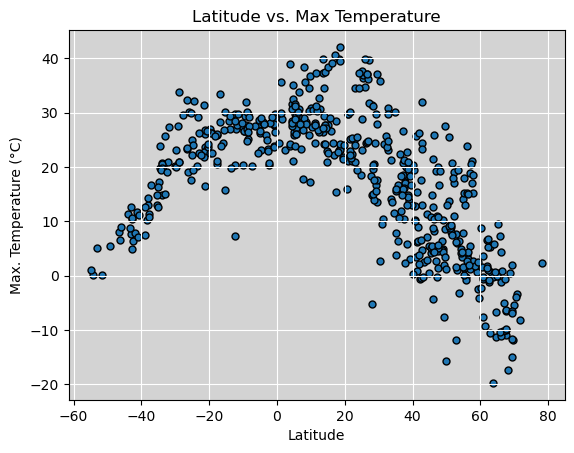

In [8]:
city_data_df.plot.scatter("Lat", "Max Temp", edgecolor="black", s=25)
plt.title("Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max. Temperature (°C)")
plt.gca().set_facecolor("lightgrey")
plt.grid(color="white")
plt.savefig("output_data/Fig1.png")
plt.show()

#### Latitude vs. Humidity

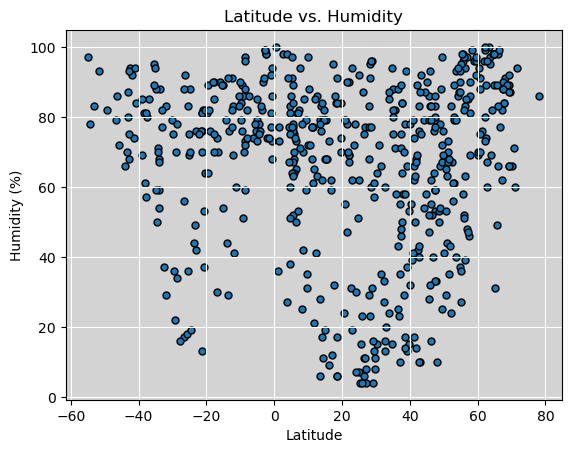

In [9]:
city_data_df.plot.scatter("Lat", "Humidity", edgecolor="black", s=25)
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.gca().set_facecolor("lightgrey")
plt.grid(color="white")
plt.savefig("output_data/Fig2.png")
plt.show()

#### Latitude vs. Cloudiness

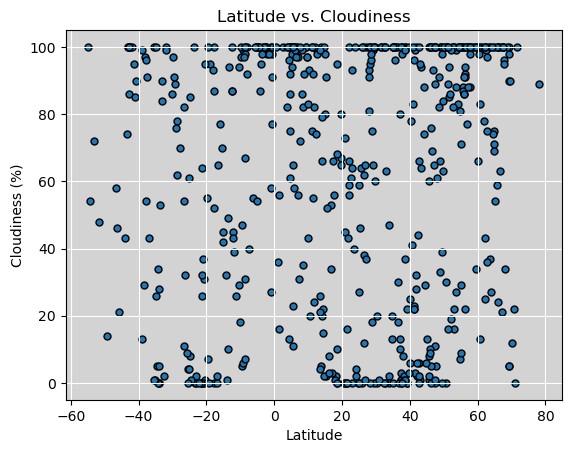

In [10]:
city_data_df.plot.scatter("Lat", "Cloudiness", edgecolor="black", s=25)
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.gca().set_facecolor("lightgrey")
plt.grid(color="white")
plt.savefig("output_data/Fig3.png")
plt.show()

#### Latitude vs. Wind Speed

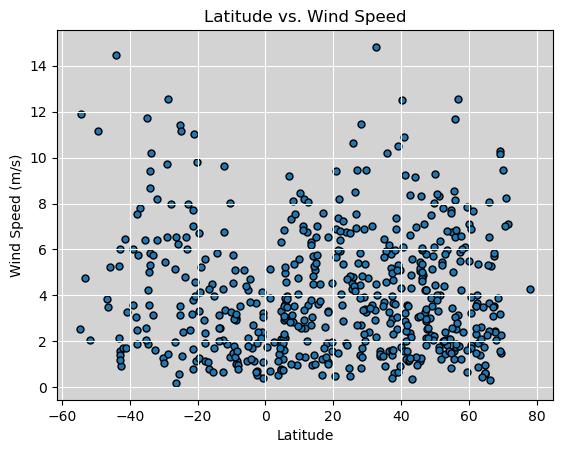

In [11]:
city_data_df.plot.scatter("Lat", "Wind Speed", edgecolor="black", s=25)
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.gca().set_facecolor("lightgrey")
plt.grid(color="white")
plt.savefig("output_data/Fig4.png")
plt.show()

## Linear Regressions

In [12]:
# Divide the Weather DataFrame into Northern and Southern Hemispheres

In [13]:
# Weather data for cities in the Northern Hemisphere (Latitute >= 0)
city_data_df_northern = city_data_df.loc[city_data_df["Lat"]>=0, :]
city_data_df_northern.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,yellowknife,62.4560,-114.3525,-1.25,89,100,3.66,CA,1713783628
3,lubang,13.8584,120.1240,29.32,76,5,3.08,PH,1713783629
7,holualoa,19.6228,-155.9522,21.90,74,67,1.60,US,1713783634
9,thompson,55.7435,-97.8558,-0.31,98,100,1.57,CA,1713783636
10,okha,53.5739,142.9478,-3.27,93,27,1.83,RU,1713783637


In [14]:
# Weather data for cities in the Southern Hemisphere (Latitute < 0)
city_data_df_southern = city_data_df.loc[city_data_df["Lat"]<0, :]
city_data_df_southern.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,22.17,75,61,11.40,PN,1713783626
1,invercargill,-46.4000,168.3500,6.57,86,46,3.49,NZ,1713783507
4,port elizabeth,-33.9180,25.5701,20.78,68,28,8.67,ZA,1713783630
5,morada nova,-5.1067,-38.3725,26.32,85,100,2.13,BR,1713783632
6,avarua,-21.2078,-159.7750,26.07,70,64,7.03,CK,1713783633


In [15]:
# Function definition to plot the Linear Regression of Latitude vs. Weather Data
def regression_plot(y, hemisphere, title, y_label):
    
    if hemisphere == "Northern":
        x_values = city_data_df_northern["Lat"]
        y_values = city_data_df_northern[y]

    if hemisphere == "Southern":
        x_values = city_data_df_southern["Lat"]
        y_values = city_data_df_southern[y]

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.title(title)
    plt.gca().set_facecolor("lightgrey")
    plt.grid(color="white")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")
    plt.show()
    print(f"The r-squared is: {rvalue**2}")  

### Temperature vs. Latitude Linear Regression Plot

The plots below illustrate the relationship between Latitude and Maximum Temperature for cities situated in both the Northern Hemisphere (latitude equal to or greater than zero) and the Southern Hemisphere (latitude less than zero).

Additionally, a linear regression model is showed along with its corresponding R-squared measure.

Analysis of the results suggests that while the relationship is not exceptionally strong (with R-squared values of 66.56% and 58.93% for cities in the Northern Hemisphere and Southern Hemisphere, respectively), there is a discernible pattern. Specifically, there exists a positive correlation between latitude and maximum temperature in cities within the Southern Hemisphere, whereas a negative correlation is observed for cities within the Northern Hemisphere

#### Northern Hemisphere

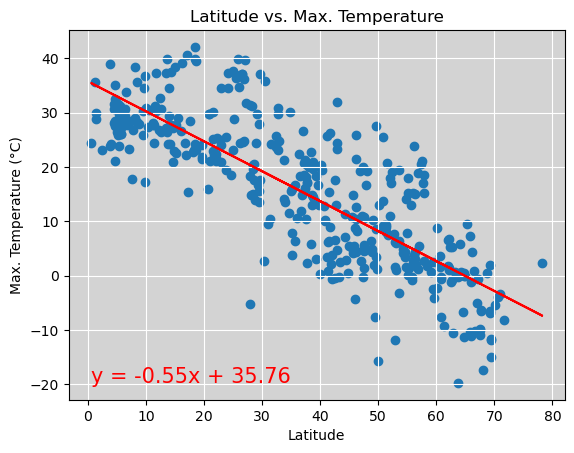

The r-squared is: 0.6656590316881288


In [16]:
regression_plot("Max Temp", "Northern", "Latitude vs. Max. Temperature", "Max. Temperature (°C)")

#### Southern Hemisphere

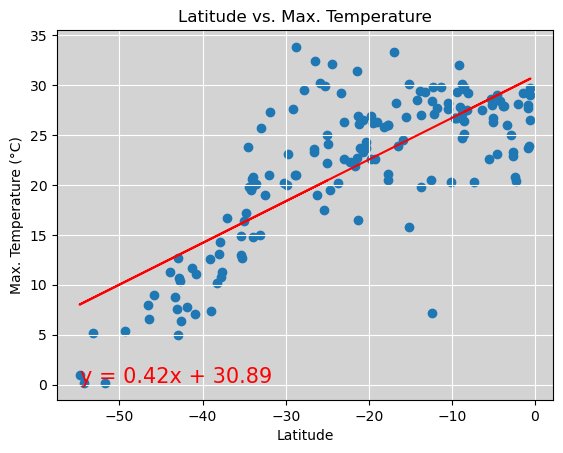

The r-squared is: 0.5893435079628011


In [17]:
regression_plot("Max Temp", "Southern", "Latitude vs. Max. Temperature", "Max. Temperature (°C)")

### Humidity vs. Latitude Linear Regression Plot

The plots below illustrate the relationship between Latitude and Humidity for cities situated in both the Northern Hemisphere (latitude equal to or greater than zero) and the Southern Hemisphere (latitude less than zero).

Additionally, a linear regression model is showed along with its corresponding R-squared measure.

After looking at the below plots, it becomes apparent that there is no discernible relationship between Latitude and Humidity, as the data points appear to be scattered randomly. Moreover, the notably low R-squared values of 3.2% and 0.8% for cities in the Northern Hemisphere and Southern Hemisphere, respectively, highlight the absence of any significant correlation.

#### Northern Hemisphere

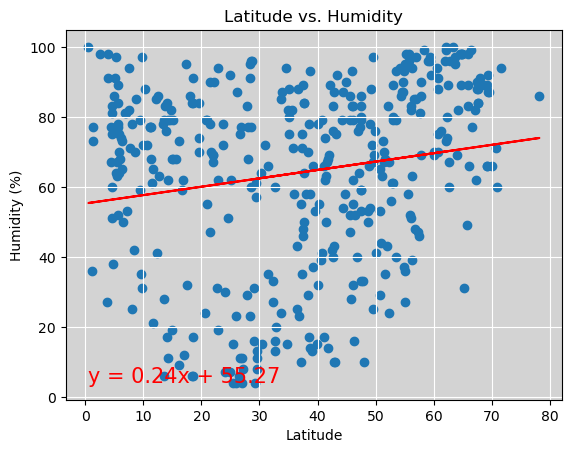

The r-squared is: 0.032772780658342306


In [18]:
regression_plot("Humidity", "Northern", "Latitude vs. Humidity", "Humidity (%)")

#### Southern Hemisphere

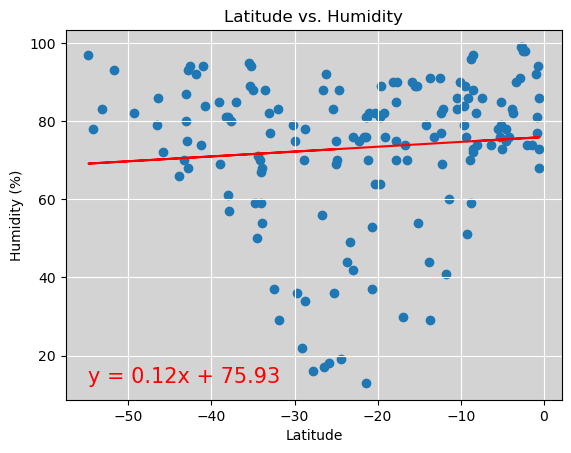

The r-squared is: 0.008377281801260853


In [19]:
regression_plot("Humidity", "Southern", "Latitude vs. Humidity", "Humidity (%)")

### Cloudiness vs. Latitude Linear Regression Plot

The plots below illustrate the relationship between Latitude and Cloudiness for cities situated in both the Northern Hemisphere (latitude equal to or greater than zero) and the Southern Hemisphere (latitude less than zero).

Additionally, a linear regression model is showed along with its corresponding R-squared measure.

After looking at the below plots, it becomes apparent that there is no discernible relationship between Latitude and Cloudiness, as the data points appear to be scattered randomly. Moreover, the notably low R-squared values of 0.3% and 2.1% for cities in the Northern Hemisphere and Southern Hemisphere, respectively, highlight the absence of any significant correlation.

#### Northern Hemisphere

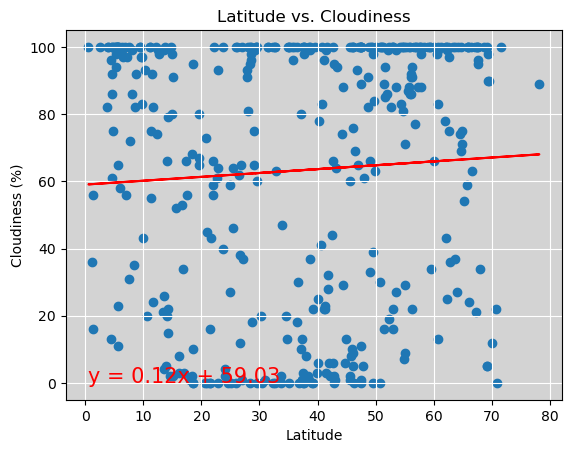

The r-squared is: 0.0034329009012657465


In [20]:
regression_plot("Cloudiness", "Northern", "Latitude vs. Cloudiness", "Cloudiness (%)")

#### Southern Hemisphere

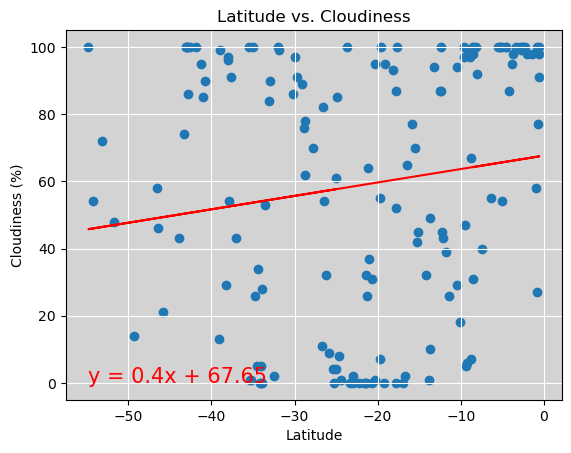

The r-squared is: 0.021545523892702617


In [21]:
regression_plot("Cloudiness", "Southern", "Latitude vs. Cloudiness", "Cloudiness (%)")

### Wind Speed vs. Latitude Linear Regression Plot

The plots below illustrate the relationship between Latitude and Wind Speed for cities situated in both the Northern Hemisphere (latitude equal to or greater than zero) and the Southern Hemisphere (latitude less than zero).

Additionally, a linear regression model is showed along with its corresponding R-squared measure.

After looking at the below plots, it becomes apparent that there is no discernible relationship between Latitude and Wind Speed, as the data points appear to be scattered randomly. Moreover, the notably low R-squared values of 0.2% and 10.8% for cities in the Northern Hemisphere and Southern Hemisphere, respectively, highlight the absence of any significant correlation.

#### Northern Hemisphere

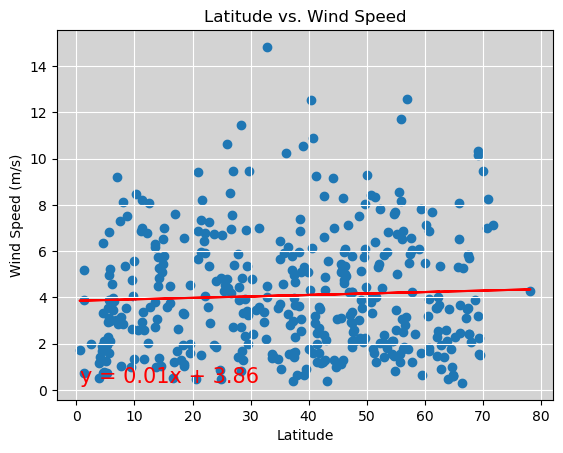

The r-squared is: 0.002334380450116528


In [22]:
regression_plot("Wind Speed", "Northern", "Latitude vs. Wind Speed", "Wind Speed (m/s)")

#### Southern Hemisphere

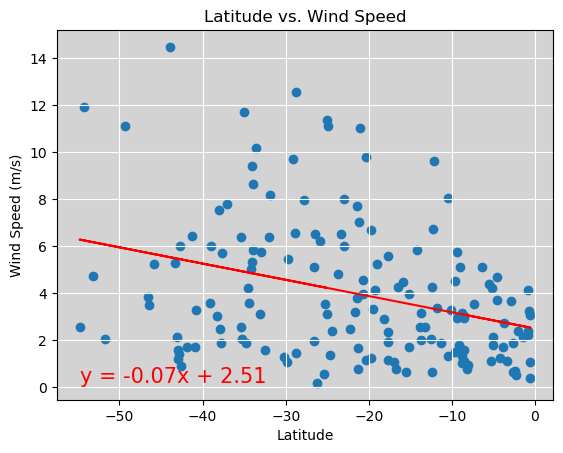

The r-squared is: 0.1085161925120761


In [23]:
regression_plot("Wind Speed", "Southern", "Latitude vs. Wind Speed", "Wind Speed (m/s)")